# Importing Libraries

In [1]:
# General Data Processing and Mathematical Libraries
import numpy as np  # for linear algebra and numerical operations
import pandas as pd  # for data manipulation and analysis
import math  # for mathematical operations (e.g., calculating log, square roots)
import matplotlib.pyplot as plt  # for data visualization (creating plots and charts)
import seaborn as sns  # for statistical data visualization and enhanced plots
import tensorflow as tf  # for deep learning model creation and training
from tensorflow.keras.models import Model, Sequential  # for building and managing models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D  # for layers
from tensorflow.keras.optimizers import Adam  # for optimization algorithms
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler  # for callbacks during training
from tensorflow.keras import regularizers  # for adding regularization to layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # for image augmentation and manipulation
from tensorflow.keras.preprocessing import image as keras_image  # for image-related utilities like load_img and img_to_array
from sklearn.model_selection import train_test_split, StratifiedKFold  # for splitting data into training and validation sets
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc  # for model evaluation and metrics
from tensorflow.keras.models import load_model  # for loading pre-trained models
import time  # for measuring execution time
from ctransformers import AutoModelForCausalLM  # for loading language models
from keras.preprocessing import image

## Responder

In [52]:
folder_path = "//kaggle/input/mumtaz-database-ssri-sswe/SSWE/responder"  # Path to the folder containing images
image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff"]  # Supported image file extensions
all_files = os.listdir(folder_path)  # Get the list of all files in the folder
image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in image_extensions)]  # Filter out only the image files
num_images = len(image_files)  # Count the number of images
print(f"Number of images in {folder_path}: {num_images}")  # Print the number of images

Number of images in //kaggle/input/mumtaz-database-ssri-sswe/SSWE/responder: 3440


## Non-Responder

In [53]:
folder_path = "/kaggle/input/mumtaz-database-ssri-sswe/SSWE/Nonresponder" # Path to the folder containing images
image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff"]  # Supported image file extensions
all_files = os.listdir(folder_path)  # Get the list of all files in the folder
image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in image_extensions)]  # Filter out only the image files
num_images = len(image_files)  # Count the number of images
print(f"Number of images in {folder_path}: {num_images}")  # Print the number of images

Number of images in /kaggle/input/mumtaz-database-ssri-sswe/SSWE/Nonresponder: 5200


## Total Number of images¶

In [54]:
Responders = 3440
Non_Responders = 5200

Total_Dataset_images  = Responders+Non_Responders
print("Total Number of images",Total_Dataset_images)

Total Number of images 8640


In [55]:
# Define the base path
base_path = "/kaggle/input/mumtaz-database-ssri-sswe/SSWE"
paths = []  # Initialize list to store file paths
labels = []  # Initialize list to store labels

# Traverse through the folders and collect paths and labels
for folder in ["responder", "Nonresponder"]:  # Iterate over the target folders
    folder_path = os.path.join(base_path, folder)  # Construct folder path
    for file in os.listdir(folder_path):  # Iterate through files in the folder
        file_path = os.path.join(folder_path, file)  # Construct file path
        paths.append(file_path)  # Append file path to the list
        labels.append(folder)  # Append folder name as label to the list

df = pd.DataFrame({"path": paths, "label": labels})  # Create a DataFrame
df  # Display the DataFrame

,path,label
0,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/r...,responder
1,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/r...,responder
2,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/r...,responder
3,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/r...,responder
4,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/r...,responder
...,...,...
8635,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/N...,Nonresponder
8636,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/N...,Nonresponder
8637,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/N...,Nonresponder
8638,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/N...,Nonresponder


In [56]:
df["label"].value_counts()

label
Nonresponder    5200
responder       3440
Name: count, dtype: int64

In [57]:
df.to_csv("rTMS_Dataset_SSWT.csv", index=False)

In [58]:
df = pd.read_csv("rTMS_Dataset_SSWT.csv")

df.head()

,path,label
0,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/r...,responder
1,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/r...,responder
2,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/r...,responder
3,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/r...,responder
4,/kaggle/input/mumtaz-database-ssri-sswe/SSWE/r...,responder


In [59]:
df["label"].value_counts()

label
Nonresponder    5200
responder       3440
Name: count, dtype: int64

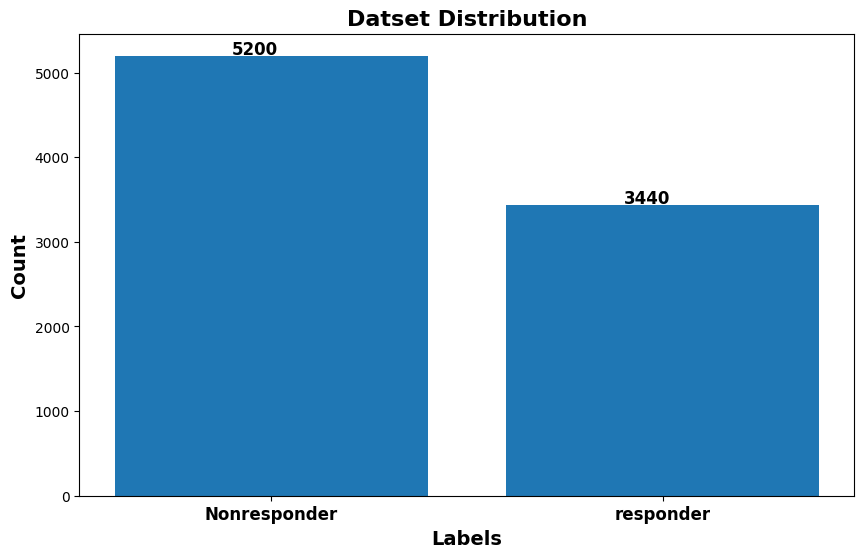

In [60]:
label_counts = df["label"].value_counts()  # Count occurrences of each label

fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axes for the plot
bars = plt.bar(label_counts.index, label_counts.values, linewidth=1.5)  # Create a bar plot

plt.xlabel('Labels', fontsize=14, fontweight='bold')  # Set x-axis label with custom font size and weight
plt.ylabel('Count', fontsize=14, fontweight='bold')  # Set y-axis label with custom font size and weight
plt.xticks(fontsize=12, fontweight='bold')  # Customize x-tick labels size and make them bold

# Add text labels on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 15, str(count), fontsize=12, fontweight='bold')

# Add a border to the bars
for bar in bars:
    bar.set_linewidth(1.5)

plt.title('Dataset Distribution', fontsize=16, fontweight='bold')  # Add a title to the plot
plt.show()  # Display the plot


## Splitting Training and Testing

In [62]:
def split_and_display_counts(df, test_size_percent=0.1, random_state=42):
    # Calculate the number of images for each class in the test set, rounding up
    num_responders_test = math.ceil(3440 * test_size_percent)
    num_non_responders_test = math.ceil(5220 * test_size_percent)
    # Split the dataset into train and test sets with stratification
    train_df, test_df = train_test_split(df, test_size=test_size_percent, stratify=df['label'], random_state=random_state)

    # Display the shapes of the resulting DataFrames
    print("Train set shape:", train_df.shape)
    print("Test set shape:", test_df.shape)
    print("\n")

    # Calculate and print the number of images in each class for the train set
    num_responders_train = 3440 - num_responders_test
    num_non_responders_train = 5220 - num_non_responders_test
    print("Number of Responders in Train Set:", num_responders_train)
    print("Number of Non_Responders in Train Set:", num_non_responders_train)

    print("\n")

    # Print the number of images in each class for the test set
    print("Number of Responders in Test Set:", num_responders_test)
    print("Number of Non_Responders in Test Set:", num_non_responders_test)

split_and_display_counts(df, test_size_percent=0.1, random_state=42)

Train set shape: (7776, 2)
Test set shape: (864, 2)


Number of Responders in Train Set: 3096
Number of Non_Responders in Train Set: 4698


Number of Responders in Test Set: 344
Number of Non_Responders in Test Set: 522


## Splitting Training and Validation

In [63]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Set up StratifiedKFold with 5 folds

fold_train_dfs = []  # Initialize list to store training sets for each fold
fold_val_dfs = []  # Initialize list to store validation sets for each fold

# Split the training set into 5 folds
for train_index, val_index in skf.split(train_df['path'], train_df['label']):  
    train_fold = train_df.iloc[train_index]  # Get training set for the current fold
    val_fold = train_df.iloc[val_index]  # Get validation set for the current fold
    fold_train_dfs.append(train_fold)  # Append training set to the list
    fold_val_dfs.append(val_fold)  # Append validation set to the list

# Print the class distribution for each fold
for fold, (train_fold, val_fold) in enumerate(zip(fold_train_dfs, fold_val_dfs), 1):
    print(f"Fold {fold} - Training Set Class Distribution:")  # Training set distribution
    print(train_fold['label'].value_counts())
    print(f"\nFold {fold} - Validation Set Class Distribution:")  # Validation set distribution
    print(val_fold['label'].value_counts())
    print("\n" + "-"*40)  # Separator for better readability

Fold 1 - Training Set Class Distribution:
label
Nonresponder    3744
responder       2476
Name: count, dtype: int64

Fold 1 - Validation Set Class Distribution:
label
Nonresponder    936
responder       620
Name: count, dtype: int64

----------------------------------------
Fold 2 - Training Set Class Distribution:
label
Nonresponder    3744
responder       2477
Name: count, dtype: int64

Fold 2 - Validation Set Class Distribution:
label
Nonresponder    936
responder       619
Name: count, dtype: int64

----------------------------------------
Fold 3 - Training Set Class Distribution:
label
Nonresponder    3744
responder       2477
Name: count, dtype: int64

Fold 3 - Validation Set Class Distribution:
label
Nonresponder    936
responder       619
Name: count, dtype: int64

----------------------------------------
Fold 4 - Training Set Class Distribution:
label
Nonresponder    3744
responder       2477
Name: count, dtype: int64

Fold 4 - Validation Set Class Distribution:
label
Nonrespo

## Create Data Generators

In [64]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

## CNN Model

In [65]:
# Define a simple CNN model
def cnn_model():
    model = Sequential()
    
    # First convolutional layer with 4 filters, kernel size 3x3, and ReLU activation
    model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())  # Batch normalization to stabilize training

    # Second convolutional layer with 8 filters
    model.add(Conv2D(12, (3, 3), activation='relu'))
    model.add(BatchNormalization())

    # Flatten the output from the convolutional layers to feed into the Dense layer
    model.add(Flatten())
    
    # Add dropout layer to reduce overfitting
    model.add(Dropout(0.25))  # Dropout with a rate of 0.3

    # Dense layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))
   
    # Compile the model with Adam optimizer and a low learning rate for stable learning
    learning_rate = 0.0001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [66]:
# Create model
model = cnn_model()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 12)   │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 220, 220, 12)   │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 580800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 580800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │       580,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581,981 (2.22 MB)

 Trainable params: 581,941 (2.22 MB)

 Non-trainable params: 40 (160.00 B)

## Model Training and Evaluation with Time Tracking and Performance Visualization

In [68]:
# Initialize EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Fold 1
Start Time: 2024-12-10 00:54:17
Found 6220 validated image filenames belonging to 2 classes.
train_generator classes {'Nonresponder': 0, 'responder': 1}
Found 1556 validated image filenames belonging to 2 classes.
val_generator classes {'Nonresponder': 0, 'responder': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 162ms/step - accuracy: 0.6854 - loss: 2.4982 - val_accuracy: 0.4055 - val_loss: 0.8163
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.9461 - loss: 0.1499 - val_accuracy: 0.7423 - val_loss: 0.4556
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.9811 - loss: 0.0580 - val_accuracy: 0.9184 - val_loss: 0.1841
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 149ms/step - accuracy: 0.9859 - loss: 0.0468 - val_accuracy: 0.9595 - val_loss: 0.1223
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 147ms/step - accuracy: 0.9978 - loss: 0.0178 - val_accuracy: 0.9479 - val_loss: 0.1693
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 32s 158ms/step - accuracy: 0.9989 - loss: 0.0120 - val_accuracy: 0.9602 - val_loss: 0.1292
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 31s 154ms/step - accuracy: 0.9988 - loss: 0.0071 - val_accuracy: 0.9647 - val_loss: 0.1246
End Time: 2024-12-10 00:57:54
Elapsed Time for Fold 1: 217.77 seconds

Training Loss: [1.01082

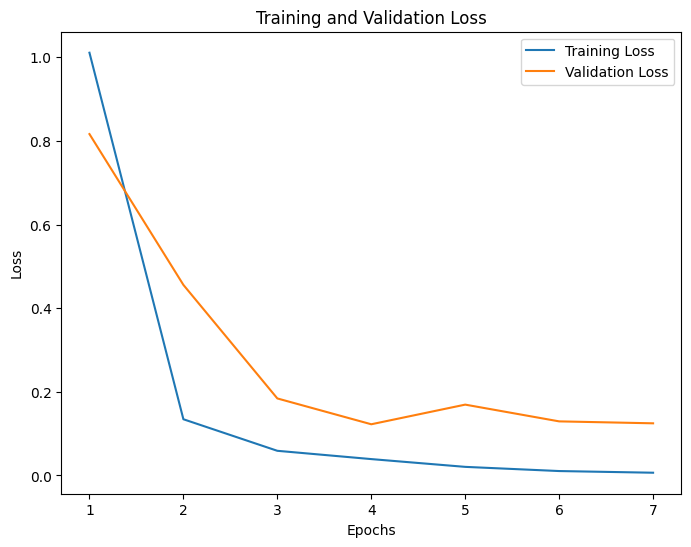

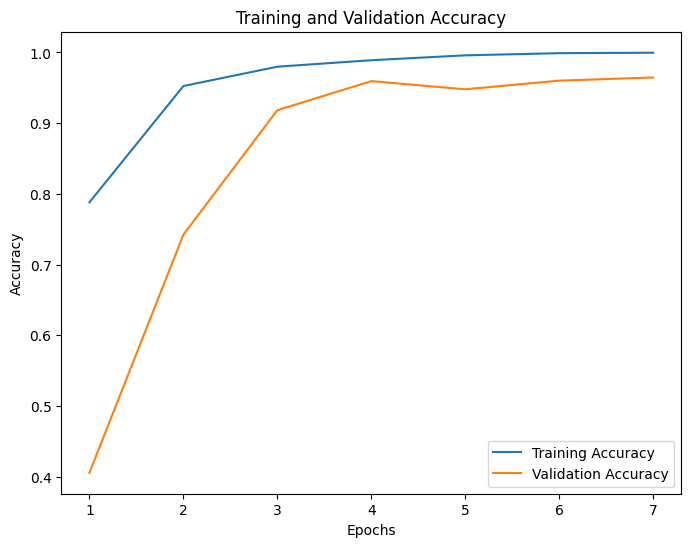

Fold 2
Start Time: 2024-12-10 00:57:55
Found 6221 validated image filenames belonging to 2 classes.
train_generator classes {'Nonresponder': 0, 'responder': 1}
Found 1555 validated image filenames belonging to 2 classes.
val_generator classes {'Nonresponder': 0, 'responder': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


166/195 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9778 - loss: 0.0774

2024-12-10 00:58:19.573926: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng4{k11=1} for conv (f32[13,8,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[13,12,220,220]{3,2,1,0}, f32[12,8,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-12-10 00:58:20.197956: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.624146137s
Trying algorithm eng4{k11=1} for conv (f32[13,8,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[13,12,220,220]{3,2,1,0}, f32[12,8,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"

195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 179ms/step - accuracy: 0.9757 - loss: 0.0840 - val_accuracy: 0.9884 - val_loss: 0.0350
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - accuracy: 0.9721 - loss: 0.0838 - val_accuracy: 0.9685 - val_loss: 0.0935
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 147ms/step - accuracy: 0.9953 - loss: 0.0152 - val_accuracy: 0.9627 - val_loss: 0.1089
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 31s 155ms/step - accuracy: 0.9986 - loss: 0.0075 - val_accuracy: 0.9878 - val_loss: 0.0340
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 150ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9929 - val_loss: 0.0246
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9916 - val_loss: 0.0268
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 144ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9923 - val_loss: 0.0255
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 150ms/step - accuracy: 1.0000 - loss: 5.7217e-04 -

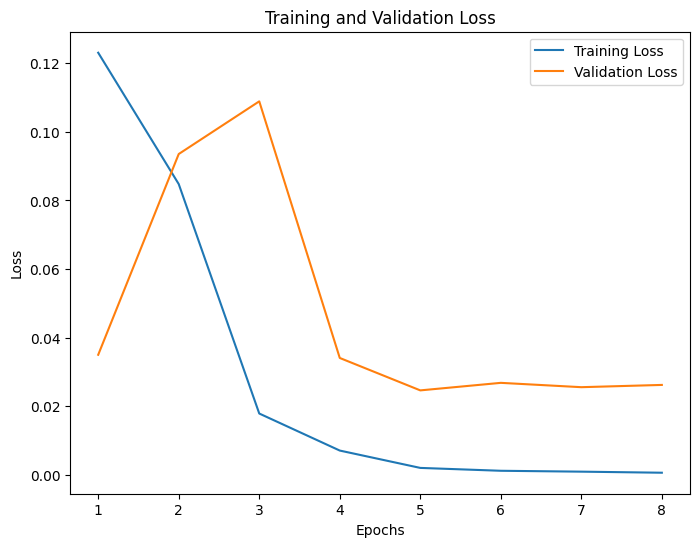

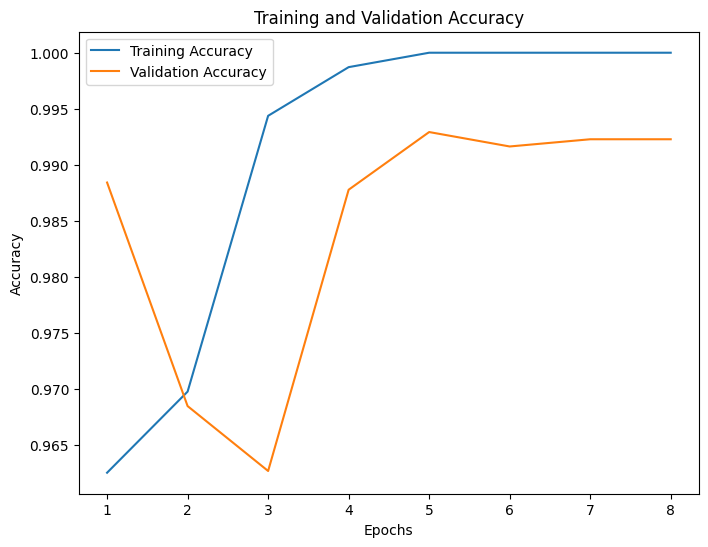

Fold 3
Start Time: 2024-12-10 01:02:00
Found 6221 validated image filenames belonging to 2 classes.
train_generator classes {'Nonresponder': 0, 'responder': 1}
Found 1555 validated image filenames belonging to 2 classes.
val_generator classes {'Nonresponder': 0, 'responder': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 148ms/step - accuracy: 0.9921 - loss: 0.0273 - val_accuracy: 0.9839 - val_loss: 0.0451
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.9662 - loss: 0.1078 - val_accuracy: 0.9936 - val_loss: 0.0193
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.9917 - loss: 0.0308 - val_accuracy: 0.9865 - val_loss: 0.0440
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 148ms/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 0.9974 - val_loss: 0.0117
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 1.0000 - loss: 7.0656e-04 - val_accuracy: 0.9955 - val_loss: 0.0140
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 147ms/step - accuracy: 1.0000 - loss: 5.2889e-04 - val_accuracy: 0.9942 - val_loss: 0.0164
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 31s 152ms/step - accuracy: 1.0000 - loss: 3.0336e-04 - val_accuracy: 0.9942 - val_loss: 0.0161
End Time: 2024-12-10 01:05:30
Elapsed Time for Fold 3: 209.99 seconds

Training Lo

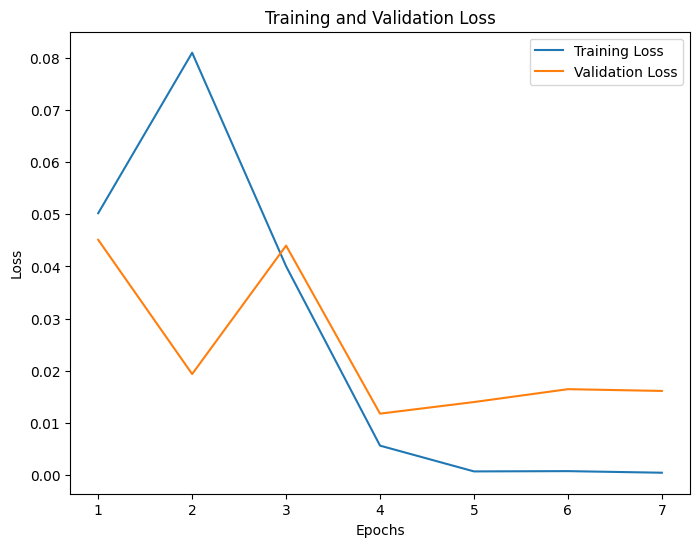

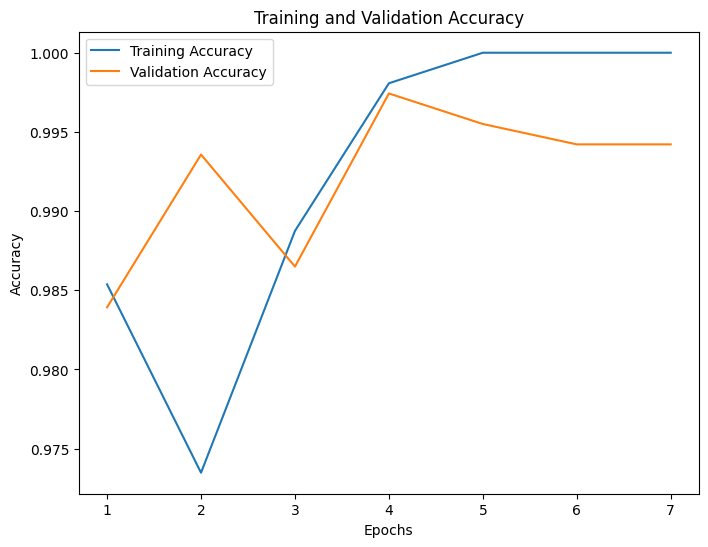

Fold 4
Start Time: 2024-12-10 01:05:30
Found 6221 validated image filenames belonging to 2 classes.
train_generator classes {'Nonresponder': 0, 'responder': 1}
Found 1555 validated image filenames belonging to 2 classes.
val_generator classes {'Nonresponder': 0, 'responder': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.9872 - loss: 0.0467 - val_accuracy: 0.9955 - val_loss: 0.0094
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 150ms/step - accuracy: 0.9929 - loss: 0.0288 - val_accuracy: 0.9955 - val_loss: 0.0185
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 148ms/step - accuracy: 0.9948 - loss: 0.0146 - val_accuracy: 0.9878 - val_loss: 0.0282
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 147ms/step - accuracy: 0.9984 - loss: 0.0045 - val_accuracy: 0.9929 - val_loss: 0.0257
End Time: 2024-12-10 01:07:30
Elapsed Time for Fold 4: 120.20 seconds

Training Loss: [0.064857617020607, 0.02111654356122017, 0.015504078008234501, 0.003928018733859062]
Validation Loss: [0.009390792809426785, 0.018483426421880722, 0.028203219175338745, 0.025723028928041458]
Training Accuracy: [0.981996476650238, 0.9930879473686218, 0.9948561191558838, 0.998714029788971]
Validation Accuracy: [0.9954984188079834, 0.9954984188079834, 0.9877813458442688, 0.9929260611534119]


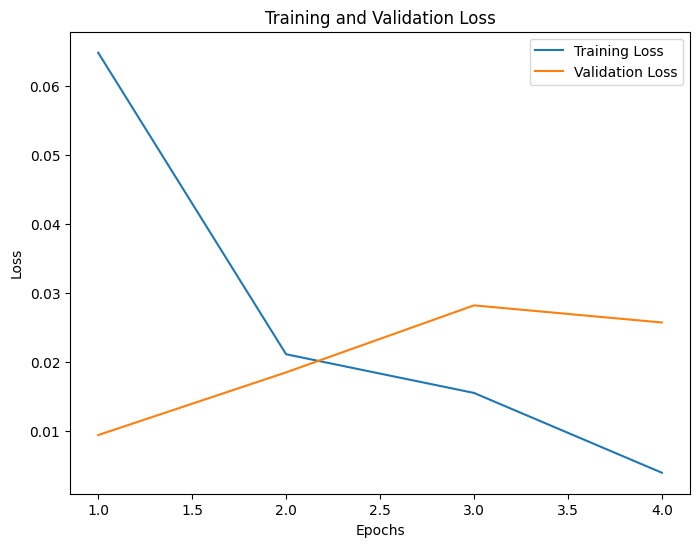

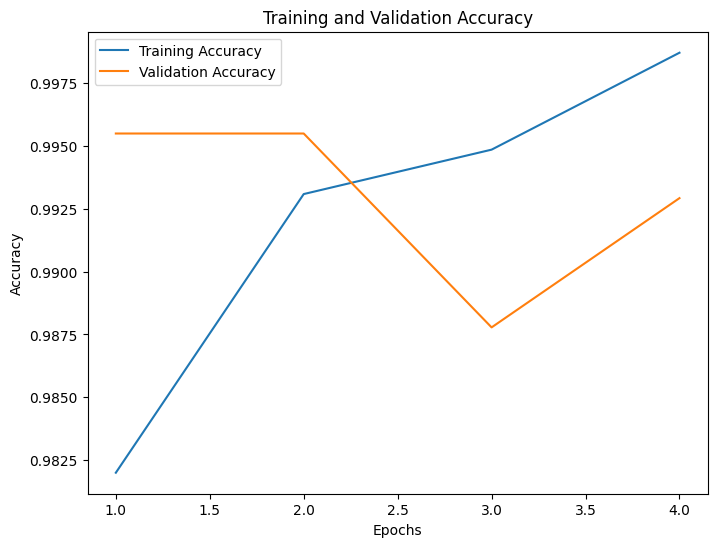

Fold 5
Start Time: 2024-12-10 01:07:31
Found 6221 validated image filenames belonging to 2 classes.
train_generator classes {'Nonresponder': 0, 'responder': 1}
Found 1555 validated image filenames belonging to 2 classes.
val_generator classes {'Nonresponder': 0, 'responder': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.9825 - loss: 0.0689 - val_accuracy: 0.9968 - val_loss: 0.0101
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 31s 153ms/step - accuracy: 0.9958 - loss: 0.0159 - val_accuracy: 0.9987 - val_loss: 0.0032
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.9983 - loss: 0.0058 - val_accuracy: 0.9691 - val_loss: 0.0958
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 31s 154ms/step - accuracy: 0.9917 - loss: 0.0222 - val_accuracy: 0.9743 - val_loss: 0.0816
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.9949 - loss: 0.0189 - val_accuracy: 0.9601 - val_loss: 0.1413
End Time: 2024-12-10 01:10:03
Elapsed Time for Fold 5: 151.96 seconds

Training Loss: [0.07290109246969223, 0.012705063447356224, 0.009343497455120087, 0.013436678797006607, 0.014070631936192513]
Validation Loss: [0.010081259533762932, 0.0031622860115021467, 0.09581374377012253, 0.08156032115221024, 0.14129044115543365]
Training Accuracy: [0.980871260166

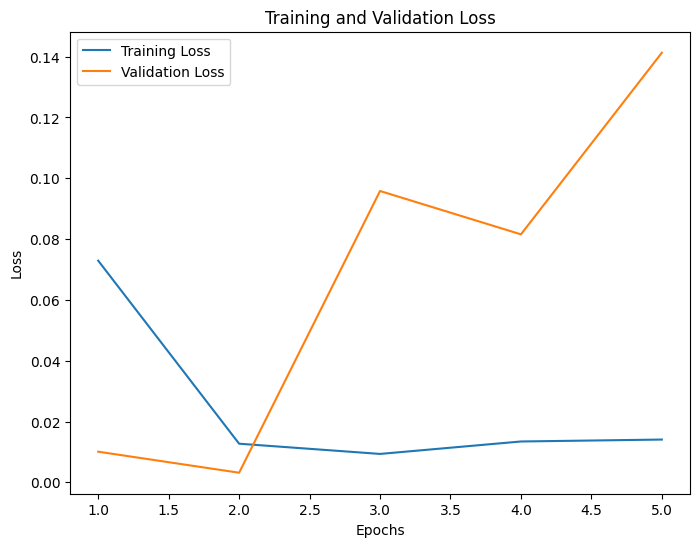

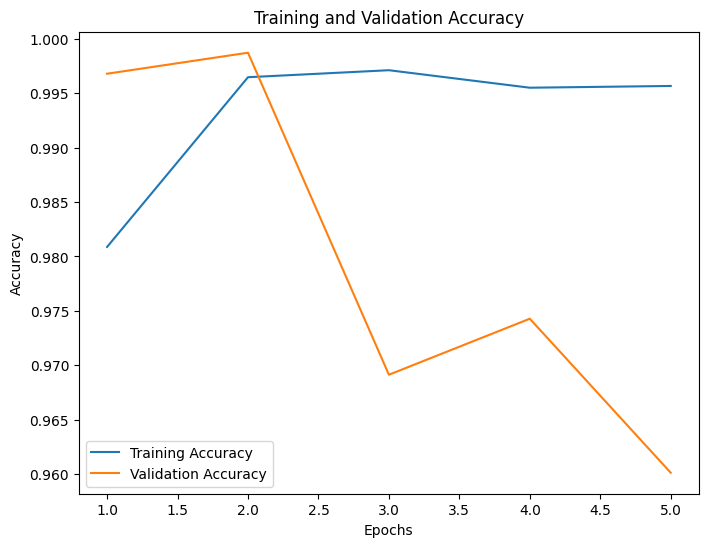

Total Training Time: 943.93 seconds


In [69]:
# Number of epochs and batch size
epochs = 10
batch_size = 32

# Initialize lists to store loss and accuracy values
all_train_loss = []
all_val_loss = []
all_train_acc = []
all_val_acc = []

# Initialize lists to store start and end times
all_start_times = []
all_end_times = []

# Loop through the folds and fit the model
for i in range(5):
    print("Fold", i + 1)

    # Record the start time for the current fold
    start_time = time.time()
    all_start_times.append(start_time)
    print("Start Time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

    # Get the current fold's training and validation sets
    fold_train = fold_train_dfs[i]
    fold_val = fold_val_dfs[i]

    # Training generator
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=fold_train,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='binary'
    )
    print("train_generator classes", train_generator.class_indices)

    # Validation generator
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=fold_val,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='binary'
    )
    print("val_generator classes", val_generator.class_indices)

    # Fit the model on the current fold's training and validation data
    history = model.fit(
        train_generator,
        epochs=epochs,
        verbose=1,
        validation_data=val_generator,
        callbacks=[early_stop]
    )

    # Record the end time for the current fold
    end_time = time.time()
    all_end_times.append(end_time)
    print("End Time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))

    # Calculate and print the elapsed time for the current fold
    elapsed_time = end_time - start_time
    print("Elapsed Time for Fold {}: {:.2f} seconds\n".format(i + 1, elapsed_time))

    # Print the training and validation loss and accuracy
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    print("Training Loss:", train_loss)
    print("Validation Loss:", val_loss)
    print("Training Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)

    # Append the loss and accuracy values to the lists
    all_train_loss.append(train_loss)
    all_val_loss.append(val_loss)
    all_train_acc.append(train_acc)
    all_val_acc.append(val_acc)

    # Plot the training and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(history.epoch) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(history.epoch) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Plot the training and validation accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(history.epoch) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(history.epoch) + 1), val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# Calculate and print the total training time
total_training_time = sum(all_end_times) - sum(all_start_times)
print("Total Training Time: {:.2f} seconds".format(total_training_time))

In [70]:
# Calculate and print the average loss and accuracy

avg_train_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_train_loss]  # Calculate average training loss for each epoch
avg_val_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_val_loss]  # Calculate average validation loss for each epoch
avg_train_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_train_acc]  # Calculate average training accuracy for each epoch
avg_val_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_val_acc]  # Calculate average validation accuracy for each epoch

print("Average Training Loss:", avg_train_loss)  # Print average training loss
print("Average Validation Loss:", avg_val_loss)  # Print average validation loss
print("Average Training Accuracy:", avg_train_acc)  # Print average training accuracy
print("Average Validation Accuracy:", avg_val_acc)  # Print average validation accuracy

Average Training Loss: [0.18287981946819595, 0.029651958458998706, 0.025526903785898218, 0.02635156433098018, 0.024491392821073533]
Average Validation Loss: [0.28589425342423574, 0.046809152932837605, 0.023821150617940084, 0.020450116833671927, 0.0663816103246063]
Average Training Accuracy: [0.9577629566192627, 0.9906767457723618, 0.9922382746423993, 0.9921636432409286, 0.9931200861930847]
Average Validation Accuracy: [0.842636798109327, 0.9845659211277962, 0.992191093308585, 0.9929260611534119, 0.9798070788383484]


In [71]:
# Calculate and print the average loss and accuracy
mean_train_loss = sum(avg_train_loss) / len(avg_train_loss)  # Calculate the mean of average training losses
mean_val_loss = sum(avg_val_loss) / len(avg_val_loss)  # Calculate the mean of average validation losses
mean_train_acc = sum(avg_train_acc) / len(avg_train_acc)  # Calculate the mean of average training accuracies
mean_val_acc = sum(avg_val_acc) / len(avg_val_acc)  # Calculate the mean of average validation accuracies

print("Mean Training Loss:", mean_train_loss)  # Print the mean training loss
print("Mean Validation Loss:", mean_val_loss)  # Print the mean validation loss
print("Mean Training Accuracy:", mean_train_acc)  # Print the mean training accuracy
print("Mean Validation Accuracy:", mean_val_acc)  # Print the mean validation accuracy

Mean Training Loss: 0.057780327773029314
Mean Validation Loss: 0.08867125682665833
Mean Training Accuracy: 0.9851923412936074
Mean Validation Accuracy: 0.9584253905074938


## Model Evaluation on Test Set

In [72]:
# Record the start time of the evaluation process
start_time = time.time()  

# Set the test set as the final evaluation set
evaluation_set = test_df  

# Print the length of the evaluation set
print("Evaluation set length:", len(evaluation_set))  

# Create a data generator for the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,  # DataFrame containing evaluation data
    x_col='path',  # Column with image paths
    y_col='label',  # Column with labels
    target_size=(224, 224),  # Resize images to the specified dimensions
    batch_size=batch_size,  # Batch size for evaluation
    seed=1234,  # Seed for reproducibility
    shuffle=False,  # Do not shuffle the evaluation set
    class_mode='binary'  # Specify binary classification
)

# Print the class indices for the evaluation generator
print("evaluation_generator classes", evaluation_generator.class_indices)  

# Evaluate the model on the evaluation generator
evaluation_loss, evaluation_accuracy = model.evaluate(evaluation_generator)  

end_time = time.time()  # Record the end time of the evaluation process

# Calculate and print the elapsed time for evaluation
elapsed_time = end_time - start_time  
print("Time taken for evaluation:", elapsed_time, "seconds")  

# Print evaluation metrics
print("Evaluation Loss:", evaluation_loss)  
print("Evaluation Accuracy:", evaluation_accuracy)  

Evaluation set length: 864
Found 864 validated image filenames belonging to 2 classes.
evaluation_generator classes {'Nonresponder': 0, 'responder': 1}
 1/27 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 1.0000 - loss: 0.0230

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.9509 - loss: 0.3145
Time taken for evaluation: 5.669985294342041 seconds
Evaluation Loss: 0.29840758442878723
Evaluation Accuracy: 0.9525462985038757


## Save Trained Model

In [82]:
# # After training, save the model
model.save('Saved_Models/CNN_SSWT.h5')
print("Model saved successfully")

Model saved successfully


## Performance Metrics

## Model Evaluation: Confusion Matrix and Classification Report

In [74]:
# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)  # Get predictions on the evaluation set
evaluation_pred_classes = (evaluation_predictions > 0.5).astype(int)  # Convert predictions to binary class (0 or 1)

# Get true labels
true_labels = evaluation_generator.classes  

# Class names for interpretation
class_names = ['Non_Responders', 'Responders']  

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, evaluation_pred_classes)  
print("Confusion Matrix:")
print(conf_matrix)  # Print the confusion matrix

# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes, target_names=class_names)  
print("Classification Report:")
print(class_report)  # Print the classification report

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step
Confusion Matrix:
[[495  25]
 [ 16 328]]
Classification Report:
                precision    recall  f1-score   support

Non_Responders       0.97      0.95      0.96       520
    Responders       0.93      0.95      0.94       344

      accuracy                           0.95       864
     macro avg       0.95      0.95      0.95       864
  weighted avg       0.95      0.95      0.95       864



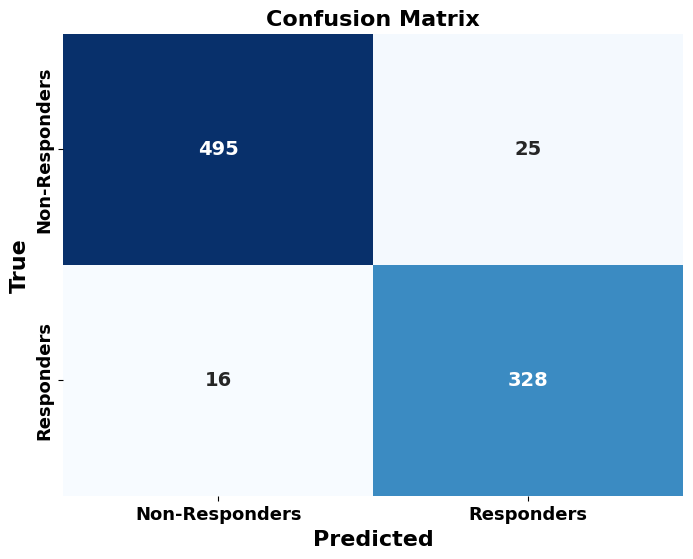

In [75]:
def plot_confusion_matrix(conf_matrix, class_names):  # Function to plot confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a subplot

    # Increase font size for true and predicted labels
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names, ax=ax, annot_kws={"size": 14, "weight": "bold"})  # Annotate values with bold font

    # Increase font size and make class labels bold
    ax.set_xticklabels(class_names, fontsize=13, weight='bold')  # Set x-axis labels
    ax.set_yticklabels(class_names, fontsize=13, weight='bold')  # Set y-axis labels

    plt.xlabel('Predicted', fontsize=16, weight='bold')  # Increase font size and weight for x label
    plt.ylabel('True', fontsize=16, weight='bold')  # Increase font size and weight for y label
    plt.title('Confusion Matrix', fontsize=16, weight='bold')  # Increase font size and weight for title
    plt.show()  # Display the plot

# Confusion matrix (conf_matrix) and class names
class_names = ['Non-Responders', 'Responders']  # Define class names
plot_confusion_matrix(conf_matrix, class_names)  # Call the function to plot the confusion matrix

## Detailed Performance Metrics Analysis: Confusion Matrix, Class-Specific Precision, Recall, Specificity, and F1-Score

In [76]:
# confusion matrix (conf_matrix) and class names

class_names = ['Non_Responders', 'Responders']  # Define class names

# Print confusion matrix with counts
for i in range(len(class_names)):  # Iterate through each class
    print(f"\nClass: {i} ({class_names[i]})")  # Print the class label
    true_positives = conf_matrix[i, i]  # True Positives
    true_negatives = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))  # True Negatives
    false_positives = np.sum(conf_matrix[:, i]) - true_positives  # False Positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives  # False Negatives

    # Print counts for each metric
    print(f"True Positives (TP): {true_positives}")
    print(f"True Negatives (TN): {true_negatives}")
    print(f"False Positives (FP): {false_positives}")
    print(f"False Negatives (FN): {false_negatives}")
    print("====================")

# Calculate and print overall metrics
overall_accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)  # Overall Accuracy
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)  # Precision
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)  # Recall

# Print overall metrics
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Class: 0 (Non_Responders)
True Positives (TP): 495
True Negatives (TN): 328
False Positives (FP): 16
False Negatives (FN): 25

Class: 1 (Responders)
True Positives (TP): 328
True Negatives (TN): 495
False Positives (FP): 25
False Negatives (FN): 16

Overall Metrics:
Overall Accuracy: 0.9525462962962963
Precision: [0.96868885 0.92917847]
Recall: [0.95192308 0.95348837]


In [77]:
# confusion matrix (conf_matrix) and class names
class_names = ['Non_Responders', 'Responders']  # Define class names

# Print class-specific metrics
for i in range(len(class_names)):  # Iterate through each class
    # Calculate precision, recall, specificity, and F1-score for each class
    precision = conf_matrix[i, i] / np.sum(conf_matrix[:, i]) if np.sum(conf_matrix[:, i]) != 0 else 0  # Precision
    recall = conf_matrix[i, i] / np.sum(conf_matrix[i, :]) if np.sum(conf_matrix[i, :]) != 0 else 0  # Recall
    specificity = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1)) / (np.sum(conf_matrix) - np.sum(conf_matrix[:, i]) - np.sum(conf_matrix[i, :]) + conf_matrix[i, i])  # Specificity
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0  # F1-score

    # Print metrics for the current class
    print(f"\nClass: {class_names[i]}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-score: {f1_score:.4f}")
    print("====================")


Class: Non_Responders
Precision: 0.9687
Recall: 0.9519
Specificity: 1.0000
F1-score: 0.9602

Class: Responders
Precision: 0.9292
Recall: 0.9535
Specificity: 1.0000
F1-score: 0.9412


## ROC Curve Analysis: Evaluating Model Performance Using AUC for Classification Accuracy

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step


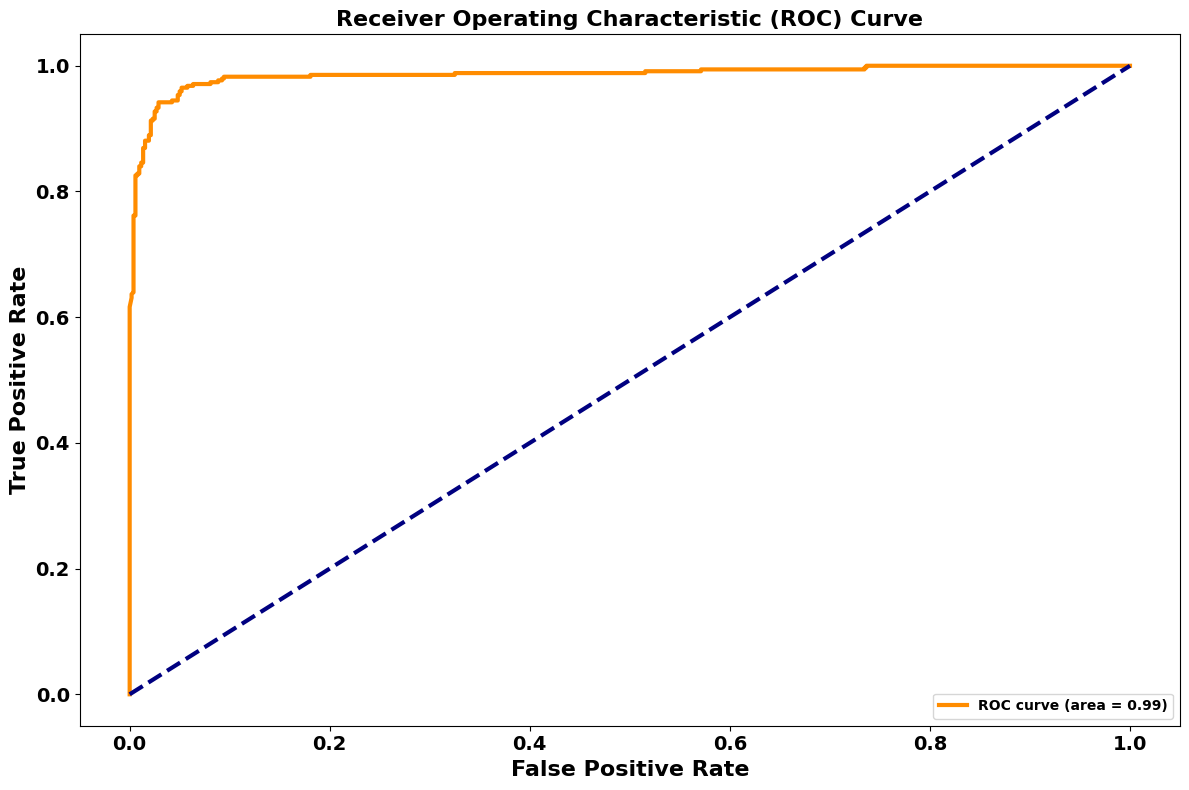

In [78]:
true_labels = evaluation_generator.classes  # Get true labels from the generator
predicted_probabilities = model.predict(evaluation_generator)  # Get predicted probabilities from the model

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)  # Compute False Positive Rate and True Positive Rate
roc_auc = auc(fpr, tpr)  # Calculate the AUC (Area Under the Curve)

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))  # Set figure size
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC curve (area = {:.2f})'.format(roc_auc))  # Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')  # Plot diagonal line (random classifier)

# Adjust label and title properties
plt.xlabel('False Positive Rate', fontsize=16, weight='bold')  # X-axis label
plt.ylabel('True Positive Rate', fontsize=16, weight='bold')  # Y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, weight='bold')  # Plot title
plt.legend(loc='lower right', fontsize=14, title_fontsize=14, fancybox=True, framealpha=0.7, edgecolor='black')  # Legend properties

# Adjust tick properties
plt.xticks(fontsize=14, fontweight='bold')  # X-axis ticks
plt.yticks(fontsize=14, fontweight='bold')  # Y-axis ticks

# Make text inside legend bold
legend = plt.legend(loc='lower right')  # Get legend object
for text in legend.get_texts():  # Iterate over legend text
    text.set_weight('bold')  # Set font weight to bold

plt.tight_layout()  # Adjust layout to fit everything
plt.show()  # Display the plot

## Prediction Accuracy Analysis: Evaluation of Correct and Incorrect Classifications

In [79]:
# Get true labels
true_labels = evaluation_generator.classes  # Retrieve true labels from the generator

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)  # Get model predictions on the evaluation set
predicted_labels = (evaluation_predictions > 0.5).astype(int)  # Convert predictions to binary labels

# Initialize counters for correct and incorrect predictions
correct_predictions = 0  # Counter for correct predictions
incorrect_predictions = 0  # Counter for incorrect predictions

# Iterate over all predictions
for i in range(len(true_labels)):  # Loop through each prediction
    if true_labels[i] == predicted_labels[i]:  # Check if prediction matches true label
        correct_predictions += 1  # Increment correct prediction count
    else:
        incorrect_predictions += 1  # Increment incorrect prediction count

# Calculate accuracy
accuracy = correct_predictions / (correct_predictions + incorrect_predictions)  # Accuracy formula

# Print the results
print("Correct Predictions:", correct_predictions)  # Print correct predictions
print("Incorrect Predictions:", incorrect_predictions)  # Print incorrect predictions
print("Accuracy:", accuracy)  # Print accuracy

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step
Correct Predictions: 823
Incorrect Predictions: 41
Accuracy: 0.9525462962962963


## Visualizing Model Predictions: Displaying Sample Images with Actual and Predicted Labels

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step


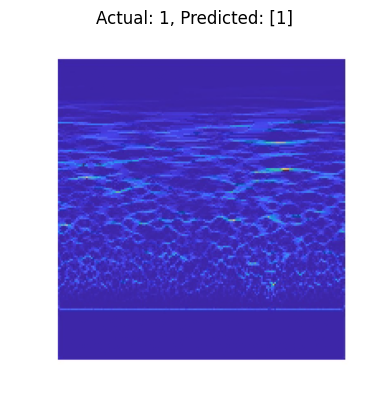

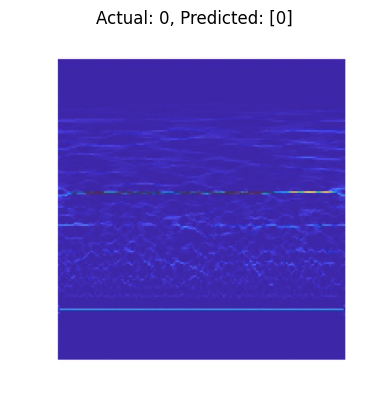

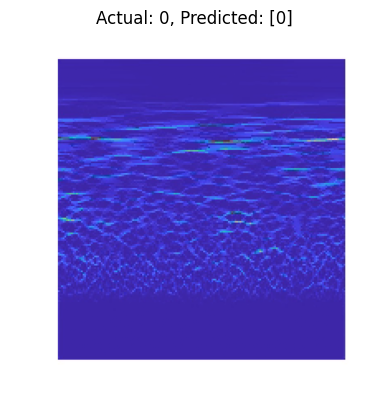

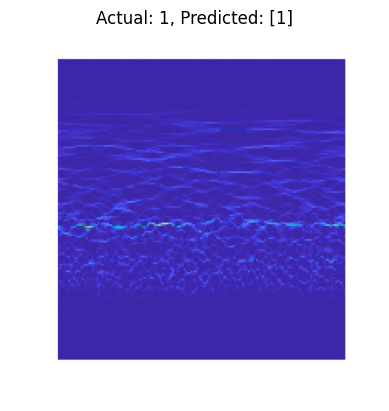

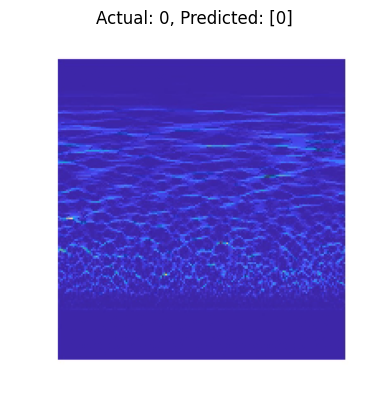

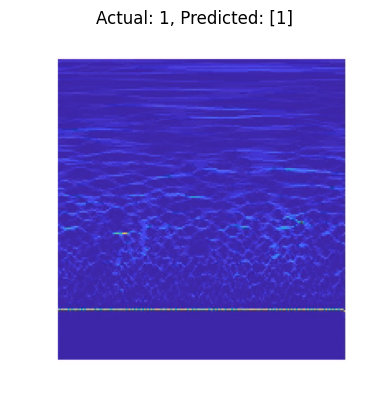

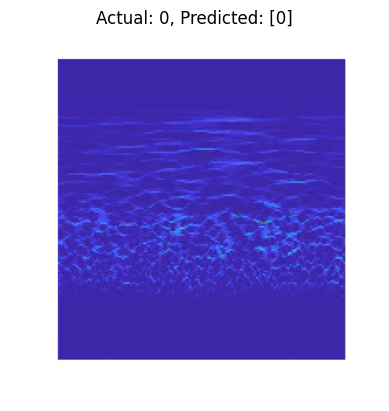

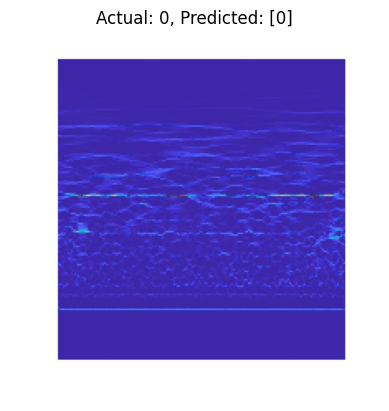

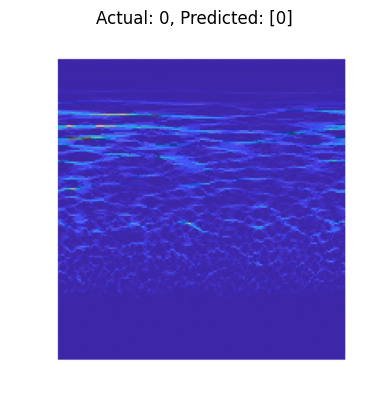

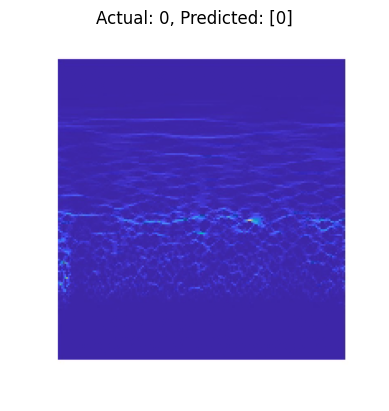

In [80]:
# Placeholder function for loading and preprocessing images
def load_and_preprocess_image(image_path):  # Function to load and preprocess an image
    img = keras_image.load_img(image_path, target_size=(224, 224))  # Load image with target size
    img_array = keras_image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch compatibility
    img_array /= 255.0  # Normalize pixel values to be between 0 and 1
    return img_array  # Return preprocessed image

# Get true labels
true_labels = evaluation_generator.classes  # Get true labels from the evaluation generator

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)  # Get model predictions
predicted_labels = (evaluation_predictions > 0.5).astype(int)  # Convert predictions to binary labels

# Display images along with actual and predicted labels
for i in range(len(true_labels[:10])):  # Loop through the first 10 predictions
    image_path = evaluation_set['path'].iloc[i]  # Get image path
    actual_label = true_labels[i]  # Get the true label
    predicted_label = predicted_labels[i]  # Get the predicted label

    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)  # Call the function to preprocess the image

    # Display the image
    plt.imshow(image[0])  # Display the first image in the batch
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")  # Display actual and predicted labels
    plt.axis('off')  # Hide axes
    plt.show()  # Show the image

## Loading and Evaluating the Saved CNN Model on the Evaluation Set

In [83]:
# Load the saved CNN model
loaded_model = load_model('Saved_Models/CNN_SSWT.h5')

# evaluation set
evaluation_set = test_df  # Set the evaluation set to the test dataframe

# Evaluate the loaded model on the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(  # Create a generator to load the evaluation set
    dataframe=evaluation_set,  # Use the test dataframe
    x_col='path',  # Column containing image paths
    y_col='label',  # Column containing labels
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=batch_size,  # Set batch size
    seed=1234,  # Set random seed for reproducibility
    shuffle=False,  # Do not shuffle data for evaluation
    class_mode='binary'  # Set the class mode to binary for binary classification
)

# Evaluate the model
evaluation_loss, evaluation_accuracy = loaded_model.evaluate(evaluation_generator)  # Evaluate model on the evaluation set

print("Evaluation Loss:", evaluation_loss)  # Print the evaluation loss
print("Evaluation Accuracy:", evaluation_accuracy)  # Print the evaluation accuracy


Found 864 validated image filenames belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9509 - loss: 0.3145
Evaluation Loss: 0.29840758442878723
Evaluation Accuracy: 0.9525462985038757


## Predicting Depression Treatment Response Using CNN and Suggesting Alternative Medications Using LLM (LLaMA 2)

In [2]:
batch_size = 32  

# Load the saved CNN model
model = load_model('Saved_Models/CNN_SSWT.h5')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 12)   │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 220, 220, 12)   │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 580800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 580800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │       580,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581,983 (2.22 MB)

 Trainable params: 581,941 (2.22 MB)

 Non-trainable params: 40 (160.00 B)

 Optimizer params: 2 (12.00 B)

#### 'Nonresponder': 0, 'responder': 1

In [3]:
# Load and preprocess the input image
def preprocess_image(img_path, target_size=(224, 224)):  # Adjust target_size as per your CNN model
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize if required by your CNN model
    return img_array


In [4]:
input_image_path = "Test_Images/SSRI_SSWT_NR.jpg"
input_image = preprocess_image(input_image_path)
# Predict using the CNN model
prediction = model.predict(input_image)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


np.int64(0)

In [5]:
# If the prediction is "Non-Responder", suggest alternative medication using LLaMA 2
if predicted_class == 0:
    # Load the LLaMA 2 model using ctransformers
    from ctransformers import AutoModelForCausalLM

    # Path to the LLaMA 2 model
    llm_model_path = "models/llama-2-7b-chat.ggmlv3.q8_0.bin"

    # Load the LLaMA 2 model
    llm = AutoModelForCausalLM.from_pretrained(
        llm_model_path,
        model_type="llama",  # Specify the model type
        max_new_tokens=256,  # Maximum number of new tokens
        temperature=0.01     # Sampling temperature
    )

    # Define the prompt
    prompt = """
    A Depression patient undergoing Selective serotonin reuptake inhibitors (SSRIs) medication has been classified as a Non-Responder by a CNN model. Non-Responder means depression patient not responding  rTMS medication
    Suggest alternative medications or treatments that could be effective for depression.
    """

    # Generate a response
    response = llm(prompt)

    print("Alternative Medication Suggestions:")
    print(response)


Alternative Medication Suggestions:
1. Ketamine infusion therapy: Ketamine has shown promise as an rapid antidepressant in treatment-resistant depression patients.
    2. Transcranial Magnetic Stimulation (TMS): TMS is a non-invasive brain stimulation technique that has been shown to be effective in treating depression, particularly for those who have not responded to other treatments.
    3. Psychotherapy: Cognitive Behavioral Therapy (CBT) and Interpersonal Therapy (IPT) are two types of psychotherapy that can help patients identify and change negative thought patterns and behaviors that contribute to depression.
    4. Mindfulness meditation: Mindfulness meditation has been shown to be effective in reducing symptoms of depression by promoting relaxation and reducing stress.
    5. Exercise therapy: Regular exercise has been shown to have antidepressant effects and can help improve mood and reduce symptoms of depression.
    6. Vagus nerve stimulation (VNS): VNS is a non-invasive pro